In [23]:
import numpy as np
import pandas as pd

# tree 관련
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error


# kfold cv 라이브러리
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.datasets import load_iris

# 의사결정나무

* 간단한 예제

In [4]:
# 데이터 생성
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

# 모델 생성
model = tree.DecisionTreeRegressor()

# 훈련
model.fit(X, y)

# 평가용 데이터 활용, 예측
model.predict([[1, 1]])

array([0.5])

* 실데이터 적용

In [5]:
# 데이터 준비
iris = load_iris()

X, y = iris.data, iris.target

# DecisionTree 생성 (옵션 설정하기)
model = tree.DecisionTreeClassifier(max_depth=2)

# 모델 학습
model.fit(X, y)

# test data 예측하기
model.predict([[5.6, 2.4, 4.1, 1.1]])

array([1])

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

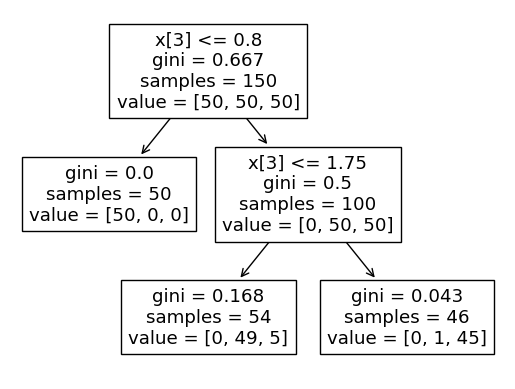

In [6]:
# 시각화
tree.plot_tree(model)

In [10]:
r = export_text(model, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[1]


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

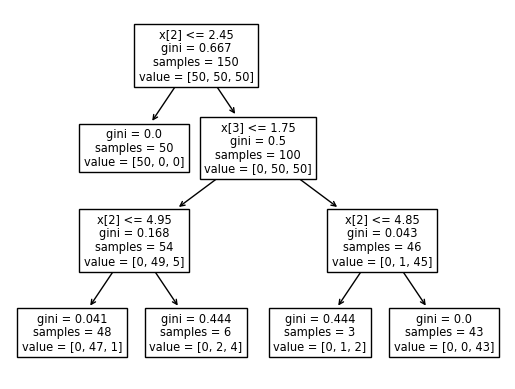

In [11]:
## depth 조절해서 다시 해보기
# 데이터 준비
iris = load_iris()

X, y = iris.data, iris.target

# DecisionTree 생성 (옵션 설정하기)
model = tree.DecisionTreeClassifier(max_depth=3)

# 모델 학습
model.fit(X, y)

# test data 예측하기
print(model.predict([[5.6, 2.4, 4.1, 1.1]]))

# 시각화
tree.plot_tree(model)

In [12]:
r = export_text(model, feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[1]


[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.5, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.3333333333333333, 0.3, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

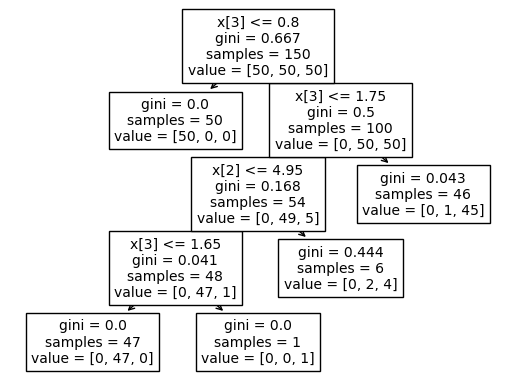

In [13]:
# 가지치기 - pruning 방법으로 depth 조정
# 데이터 준비
iris = load_iris()

X, y = iris.data, iris.target

# DecisionTree 생성 (옵션 설정하기)
model = tree.DecisionTreeClassifier(ccp_alpha=0.01) # ccp_alpha : 작을수록 규제가 적음

# 모델 학습
model.fit(X, y)

# test data 예측하기
print(model.predict([[5.6, 2.4, 4.1, 1.1]]))

# 시각화
tree.plot_tree(model)

In [14]:
r = export_text(model, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[0]


[Text(0.5, 0.5, 'gini = 0.667\nsamples = 150\nvalue = [50, 50, 50]')]

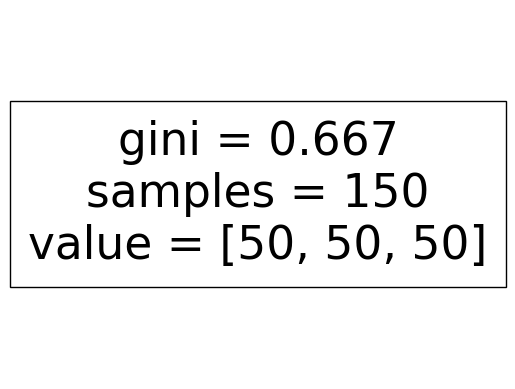

In [15]:
# 가지치기 - pruning 방법으로 depth 조정
# 데이터 준비
iris = load_iris()

X, y = iris.data, iris.target

# DecisionTree 생성 (옵션 설정하기)
model = tree.DecisionTreeClassifier(ccp_alpha=1) # ccp_alpha : 작을수록 규제가 적음

# 모델 학습
model.fit(X, y)

# test data 예측하기
print(model.predict([[5.6, 2.4, 4.1, 1.1]]))

# 시각화
tree.plot_tree(model)

# --> 가지치기를 너무 많이 함 (= 너무 엄격하게 규제를 함). 학습이 제대로 안됨.

## Boosting

In [ ]:
# 데이터를 임의로 섞기
X, y = shuffle(X, y, random_state=42)

# train / test 구분하기
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# boosting object 생성
for n_tree in [1, 10, 50, 100]:
    GradientBoostingClassifier(n_estimators=n_tree, learning_rate=1.0, max_depth=1)

# 실데이터 분석 - Hitter

In [18]:
path = '../datasets/ML_data/'

raw = pd.read_csv(path+'Hitters.csv')
hitters = raw.copy()
print(hitters.shape)
hitters.head(2)

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


In [19]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [20]:
# null값 삭제하기
hitters_notnull = hitters.dropna()

In [28]:
hitters_notnull.Salary.describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

## RandomForest 활용하기

In [27]:
n_fold = 5

for t_param in ('sqrt', 5): # sqrt(p) >> 성능 좋아짐
    print('Number of Features :', t_param)
    kfold = KFold(n_splits=n_fold)
    idx = 1

    sum_val_mse = 0
    for train, val in kfold.split(hitters_notnull):
        # print('='*40, 'Fold #', idx, '='*40)

        # train data의 feature, label 분리
        X_train = hitters_notnull.iloc[train][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        y_train = hitters_notnull.iloc[train]['Salary']
        
        # validation data의 feature, label 분리
        X_val = hitters_notnull.iloc[val][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        y_val = hitters_notnull.iloc[val]['Salary']

        # RandomForest 생성
        model = RandomForestRegressor(max_depth=3, max_features=t_param, random_state=42)

        # 학습하기
        model.fit(X_train, y_train)

        # validation data로 예측하기
        y_val_pred = model.predict(X_val)

        # val MSE 구하기
        val_MSE = mean_squared_error(y_val, y_val_pred)
        print('Fold #', idx, "| validation's MSE :", val_MSE)

        # val_MSE 합하기
        sum_val_mse += val_MSE
        # idx에 1 추가하기
        idx += 1

    print('Average of Validation MSE :', round((sum_val_mse/n_fold), 3))
    print('+'*100)

Number of Features : sqrt
Fold # 1 | validation's MSE : 47337.92693419567
Fold # 2 | validation's MSE : 181285.81994311744
Fold # 3 | validation's MSE : 122006.14121461856
Fold # 4 | validation's MSE : 110645.03081606995
Fold # 5 | validation's MSE : 69502.95962960005
Average of Validation MSE : 106155.576
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Number of Features : 5
Fold # 1 | validation's MSE : 51998.92046505516
Fold # 2 | validation's MSE : 179097.90437770737
Fold # 3 | validation's MSE : 115701.27661641834
Fold # 4 | validation's MSE : 101038.45076473629
Fold # 5 | validation's MSE : 71709.86669516165
Average of Validation MSE : 103909.284
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
